# Übung 4

In [3]:
# Import all packages needed
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1. Categorical Encoding

Für die erste Aufgabe verwenden wir ein Datenset des [UCI Machine Learning Repositories](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data), welches sich um [Daten von Automobilen](https://archive.ics.uci.edu/ml/datasets/automobile) handelt.

Dieses Datenset hat sowohl kategorische als auch nummerische Variablen. Die Aufbereitung und erste Sichtung der Daten ist im folgenden Code-Absatz bereits vorgenommen worden.

In [4]:
# Definiere die Spaltennamen als Liste
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Lese die CSV-Datei ein konvertiere die "?" als NaN-Werte
auto_df = pd.read_csv("./src/imports-85.data", header = None,
                      names = headers, na_values="?")

# Erstsichtung der Daten
auto_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
# Sichtung der Datentypen
auto_df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In dieser Aufgabe werden wir uns maßgeblich mit den kategorischen Variablen beschäftigen, also den Spalten, die `object` als Datentyp im Datensatz ausweisen.

---

**Aufgabe 1**: Erstelle eine Kopie des Datensatzes, welches nur die Spalten mit kategorischen Werten beinhaltet und nenne dieses `cat_df`.

In [6]:
### CODE HERE ###
cat_df = auto_df.select_dtypes(include=[object]).copy()

In [7]:
### TEST HERE ###
check = any(item in list(auto_df.select_dtypes(include=['int', 'float']).columns) for item in list(cat_df.columns))

if cat_df.shape[0] == auto_df.shape[0] and cat_df.shape[1] == 10 and not check:
    print("Test successful")

Test successful


Bevor wir den Encodierung starten, müssen wir uns vorab noch mit den fehlenden Werten auseinandersetzen.

---

**Aufgabe 2:** Weise die Zeilen des Datensatzes aus, die mindestens einen fehlenden Wert vorweisen.

In [8]:
### CODE HERE ###
cat_df[cat_df.isnull().any(axis=1)]

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
27,dodge,gas,turbo,NaN,sedan,fwd,front,ohc,four,mpfi
63,mazda,diesel,std,NaN,sedan,fwd,front,ohc,four,idi


---

**Aufgabe 3:** Für die fehlenden Werte der Spalte `num_doors`, finde den Wert der am häufigsten vorkommt und ersetze die fehlenden Werte mit diesen.

In [9]:
### CODE HERE ###
high_count = cat_df['num_doors'].value_counts().index[0]
cat_df['num_doors'].replace(np.nan, high_count, inplace=True)

In [10]:
###  TEST HERE ###
if cat_df[cat_df.isnull().any(axis=1)].shape[0] == 0 and cat_df.loc[[27, 63], :]['num_doors'].unique()[0] == 'four':
    print("Test successful")

Test successful


Nach dem Abschluss der Bereinigung, widmen wir uns im nächsten Schritt der Encodierung des Datensets. Hierfür würden wir die Werte, als ausgeschriebene Zahlen im Datenset sind, in Integer überführen. In diesem Beispiel sind es `[num_doors, num_cylinders]`.

---

**Aufgabe 4:** Ersetze die Werte der Spalten `[num_doors, num_cylinders]` durch Integer. Finde im ersten Schritt die jeweiligen Werte heraus und ersetze diese anschließend.

In [11]:
### CODE HERE ###
print('num_doors:')
print(cat_df['num_doors'].value_counts())
print('--------')
print('num_doors:')
print(cat_df['num_cylinders'].value_counts())

num_doors:
four    116
two      89
Name: num_doors, dtype: int64
--------
num_doors:
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64


In [12]:
### CODE HERE ###
map_num_dic = {'one' : 1, 'two' : 2, 'three' : 3, 'four' : 4, 'five': 5, 'six' : 6, 'seven' : 7, 'eight' : 8,
                 'nine' : 9, 'ten' : 10, 'eleven': 11, 'twelve': 12}

cat_df['num_doors'] = cat_df['num_doors'].map(map_num_dic)
cat_df['num_cylinders'] = cat_df['num_cylinders'].map(map_num_dic)

In [13]:
### TEST HERE ####
num_1 = [116, 89]
num_2 = [159, 24, 11, 5, 4, 1, 1]
 
if num_1 == list(cat_df['num_doors'].value_counts()) and num_2 == list(cat_df['num_cylinders'].value_counts()):
    if all(list(cat_df.select_dtypes(include=[int]).columns) for item in ['num_doors', 'num_cylinders']):
        print("Test successful")
    
cat_df.dtypes

Test successful


make               object
fuel_type          object
aspiration         object
num_doors           int64
body_style         object
drive_wheels       object
engine_location    object
engine_type        object
num_cylinders       int64
fuel_system        object
dtype: object

Nachdem wir die ersten Werte überführt haben, würde wir gerne auch ein `Label Encoding` auf eine Spalte anwenden, die nicht per se nummerische Werte beinhaltet.

---

**Aufgabe 5**: Transformiere die folgenden Werte in `body_style` wie folgt:
- convertible = 0
- hardtop = 1
- hatchback = 2
- sedan = 3
- wagon = 4

In [14]:
### CODE HERE ###
le = preprocessing.LabelEncoder()
le.fit(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'])
cat_df["body_style"] = le.transform(cat_df["body_style"])

In [15]:
## TEST HERE ####
style_list = ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']
if cat_df["body_style"].sum() == 536 and all(list(le.classes_) for item in style_list):
    print("Test successful")
    
cat_df['body_style'].value_counts()

Test successful


3    96
2    70
4    25
1     8
0     6
Name: body_style, dtype: int64

Nach der erfolgreichen Transformation durch Nutzung des `Label Encoders`, merken wir, dass die Transformation eine implizte Rangfolge vorgibt und dies für unsere Ziele der Datenanalyse nicht hilfreich ist. Deswegen würden wir gerne für die Spalte `drive_wheels` die Methode `One-Hot-Encoding` verwenden.

---

**Aufgabe 6:** Transformiere die Elemente der Spalte `drive_wheels` in separate Spalten mit den Werten 0 und 1 durch Nutzung des `One-Hot-Encodings`. Nehme zum Ende die bisherige `drive_wheels` Sparte aus dem Dataset. Die neuen Spalten sollten in der Benamung den Prefix `drive_wheels_`enthalten. 

**Tipp:** Wenn `n` die Anzahl der Elemente der Spalte `drive_wheels` ist, sollte die Encodierung sollte in `N-1`Merkmale enthalten. Bitte schreibe auch eine kurze Begründung, warum das sinnvoll ist.

`### BEGRÜNDUNG HERE ###`

In [16]:
### CODE HERE ###
cat_df = pd.get_dummies(data = cat_df, prefix='drive_wheels', columns=['drive_wheels'], drop_first = True)

In [17]:
### TEST HERE ###
if cat_df['drive_wheels_fwd'].sum() + cat_df['drive_wheels_rwd'].sum() == 196 \
    and cat_df.shape[0] * cat_df.shape[1] == 2255:
    print("Test successful")
    
cat_df.head(5)

Test successful


,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,2,0,front,dohc,4,mpfi,0,1
1,alfa-romero,gas,std,2,0,front,dohc,4,mpfi,0,1
2,alfa-romero,gas,std,2,2,front,ohcv,6,mpfi,0,1
3,audi,gas,std,4,3,front,ohc,4,mpfi,1,0
4,audi,gas,std,4,3,front,ohc,5,mpfi,0,0


Im nächsten Schritt würden wir gerne die Spalte `engine_type` transformieren. Lasst uns zuerst einem Blick auf die Verteilung werden.

In [18]:
cat_df['engine_type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

`ohc` als Kategorie der `engine_type` Spalte scheint in unterschiedlichen Ausprägungen vorzukommen. Dies würden wir gerne vereinheitlichen und anschließend alleinig die Unterscheidung machen, ob ein Motor `ohc`ist oder nicht.

---

**Aufgabe 7**: Gruppiere alle `ohc` Typen und führe anschließend eine Transformation in nummerische Werte durch, sodass alle `ohc` Werte in `1` überführt werden und alle **nicht** `ohc` Werte in 0. Benenne die neue Spalte `ohc_code` und entferne anschließend die bisherige `engine_type` Spalte.

In [19]:
### CODE HERE ###
cat_df['ohc_code'] = np.where(cat_df['engine_type'].str.contains("ohc"), 1, 0)

In [20]:
### TEST HERE ###
if cat_df['ohc_code'].sum() == 189 and cat_df.loc[1:20 ,:]['ohc_code'].sum() == 19:
    print("Test successful")
    
cat_df.sample(10)['ohc_code']

Test successful


177    1
36     1
124    1
202    1
134    1
87     1
7      1
168    1
83     1
44     1
Name: ohc_code, dtype: int64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 2. Logarithmic, Square-Root und Box-Cox Transformationen

Zur Behandlung von rechtsschiefen Verteilungen können wir Methoden wie Logarithmic Transformation verwenden. Diese Methoden helfen uns dabei, die Verteilung in eine Form zu bringen, die sich eher einer Normalverteilung annähert. Dies ist zum Beispiel wichtig für die Verwendung des ML-Algorithmus `Linear Regression`.

Für die folgenden Aufgaben verwenden wir den [Boston Housing Datensatz](https://www.kaggle.com/c/boston-housing), der 506 Häuserverkäufe darlegt mit wichtigen Informationen über das Haus und deren Umgebung.

- `crim`: Pro-Kopf-Verbrechensrate nach Stadt.
- `zn`: Anteil der Wohnbauflächen, die für Grundstücke über 25.000 m² ausgewiesen sind
- `indus`: Anteil der nicht für den Einzelhandel bestimmten Gewerbeflächen pro Stadt
- `chas`: Charles River Dummy-Variable (= 1, wenn das Gebiet an den Fluss grenzt; sonst 0)
- `nox`: Konzentration von Stickoxiden (Teile pro 10 Millionen)
- `rm`: Durchschnittliche Anzahl der Zimmer pro Wohnung
- `age`: Anteil der Eigentumswohnungen, die vor 1940 gebaut wurden
- `dis`: Gewichtetes Mittel der Entfernungen zu fünf Bostoner Beschäftigungszentren
- `rad`: Index der Erreichbarkeit von Radialautobahnen
- `tax`: Vollwertiger Grundsteuersatz pro 10.000 Dollar
- `ptratio`: Schüler-Lehrer-Verhältnis nach Stadt
- `black`: 1000(Bk - 0.63)^2 wobei Bk der Anteil der Schwarzen in der Stadt ist
- `lstat`: Unterer Status der Bevölkerung (Prozent)
- `price`: Medianwert der Eigenheime in 1000er-Jahren

In [26]:
# Importiere ein Teilpackage von SKlearn zum Laden des Datensets
from sklearn.datasets import load_boston

# Lade das Datenset als JSON-Format
boston = load_boston()

# Überführe den JSON-Datensatz in einen Pandas DataFrame
boston_df = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
boston_df['PRICE'] = boston['target']

# Erhalte einen ersten Eindruck des DataFrames
boston_df.head()

/Users/pelle-svante.john/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cali

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Mit Hilfe der [`.skew()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) Funktion von Pandas erhalten wir einen ersten Eindruck der **Schiefe** der Verteilung.

Wie sind die Ausgabewerte zu interpretieren:
- Ein Schiefe-Wert von 0 bedeutet eine symmetrische Verteilung
- Ein negativer Schiefe-Wert weist auf eine asymmetrische Verteilung hin, dessen Ende (Tail) auf der linken Seite der Verteilung größer ist - **left skewed**
- Ein positiver Schiefe-Wert weist auf eine asymmetrische Verteilung hin, dessen Ende (Tail) auf der rechten Seite der Verteilung größer ist - **right skewed**

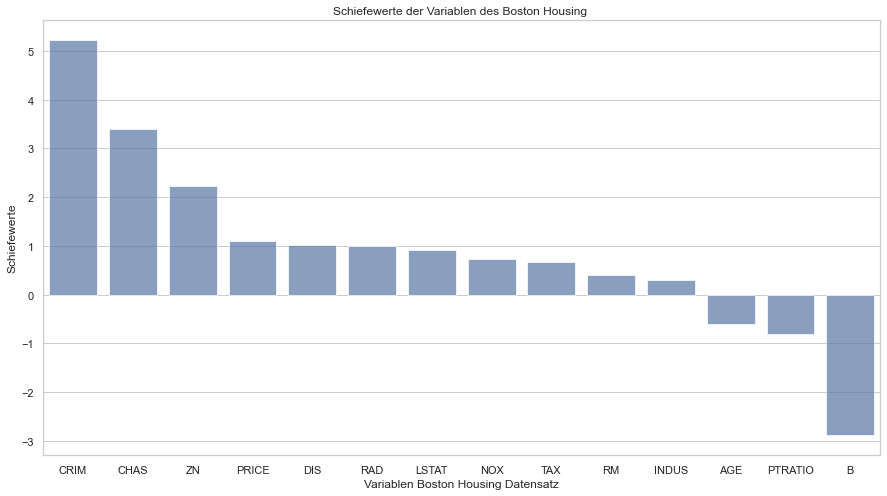

In [27]:
boston_skewness = boston_df.skew().sort_values(ascending=False)

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.barplot(x = list(boston_skewness.index), y = boston_skewness.values, 
            color = sns.color_palette()[0], alpha=.7)
plt.ylabel('Schiefewerte')
plt.xlabel('Variablen Boston Housing Datensatz')
plt.title('Schiefewerte der Variablen des Boston Housing ')

plt.show()

Die Darstellung gibt wieder, dass `CRIM` einen starken Schiefewert aufweißt und **right skewed** ist. Das können wir uns durch eine separate Darstellung noch einmal anders ausgeben lassen.

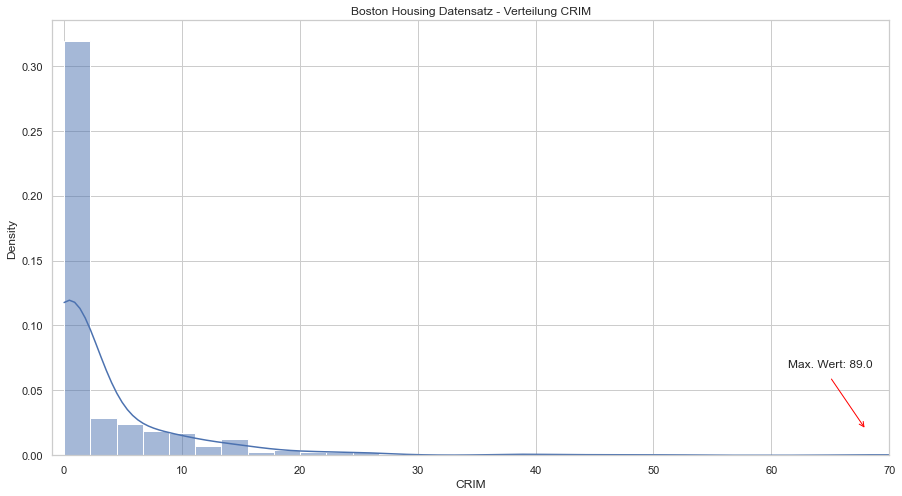

In [28]:
max_crim = round(boston_df['CRIM'].max(), 1)
text = f"Max. Wert: {max_crim}"
text_kwargs = dict(ha='center', va='center')

ax = plt.figure(figsize=(15,8))
ax = sns.histplot(boston_df['CRIM'], kde = True, stat = 'density', bins = 40)
ax.annotate("", xy=(68, 0.02), xytext=(65, 0.06), xycoords='data', arrowprops=dict(arrowstyle="->", color = 'red'))
ax.text(x = 65, y = 0.07, s = text, **text_kwargs)

plt.title("Boston Housing Datensatz - Verteilung CRIM")
plt.xlim(-1, 70)

plt.show()

Der starke Wert aus der vorherigen Abbildung wurde durch die Abbildung der Verteilung von `CRIM` als Histogramm noch einmal bestätigt. `CRIM` folgt definitiv keiner Normalverteilung. Wichtig ist, dass wir es richtig interpretieren.

**Frage**: Was zeigt das Histogramme, wenn es besonders viele niedrige Werte gibt?

Ziel sollte es sein, die Skewness zu reduzieren. Als erstes würden wir dies gerne durch eine Log-Transformation durchführen.

---

**Aufgabe 8:** Führe eine Log-Transformation durch und berechne danach den neuen Skew-Wert für die Variable `CRIM_log` und speichere diesen unter der Variable `CRIM_log_score`. Füge die neue Verteilung dem DataFrame `boston_df` unter der Spaltenbezeichnung `CRIM_log`hinzu.

In [29]:
### CODE HERE ####
boston_df['CRIM_log'] = np.log(boston_df['CRIM'])
CRIM_log_score = boston_df['CRIM_log'].skew()

Test successful


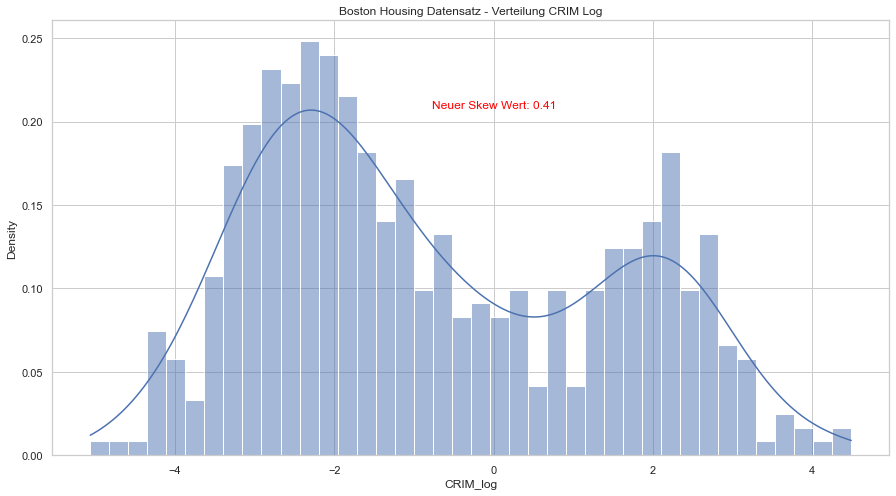

In [30]:
### TEST HERE ###
if -395 <= boston_df['CRIM_log'].sum() <= -394 and 0.4 <= CRIM_log_score <= 0.41: 
    print("Test successful")
    
    CRIM_log_score_2 = round(CRIM_log_score, 2)
    text = f"Neuer Skew Wert: {CRIM_log_score_2}"
    
    ax = plt.figure(figsize=(15,8))
    ax = sns.histplot(boston_df['CRIM_log'], kde = True, stat = 'density', bins = 40)
    ax.text(x = 0, y = 0.21, s = text, **text_kwargs, color = 'red')

    plt.title("Boston Housing Datensatz - Verteilung CRIM Log")

    plt.show()

**Frage**: Wie sind die Ergebnisse zu interpretieren?

`### BEGRÜNDUNG HERE ###`

---

**Aufgabe 9**: Vergleiche die Ergebnisse mit einer `log2` Transformation und interpretiere die Ergebnisse. Berechne anschließend den neuen Skew-Wert für die Variable `CRIM_log2` und speichere diesen unter der Variable `CRIM_log2_score`. Füge die neue Verteilung dem DataFrame `boston_df` unter der Spaltenbezeichnung `CRIM_log2`hinzu.

In [31]:
### CODE HERE ####
boston_df['CRIM_log2'] = np.log2(boston_df['CRIM'])
CRIM_log2_score = boston_df['CRIM_log2'].skew()

Test successful


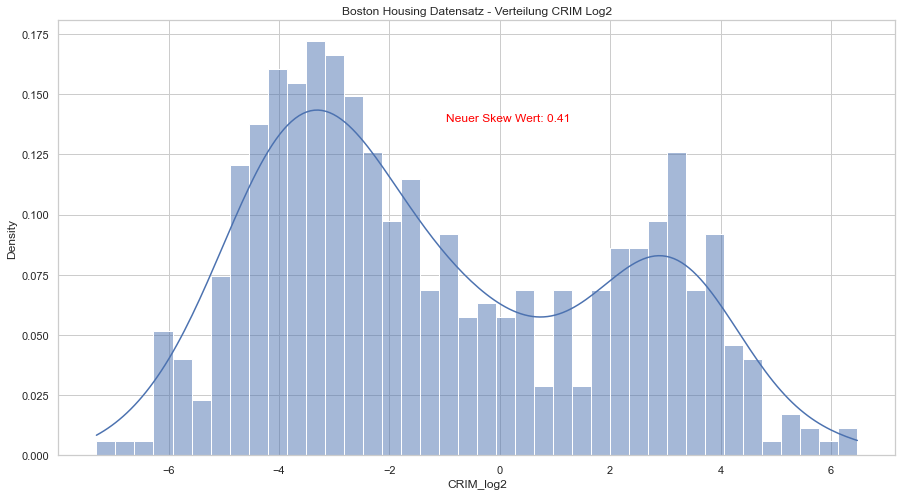

In [32]:
### TEST HERE ###
if -570 <= boston_df['CRIM_log2'].sum() <= -569 and 0.4 <= CRIM_log_score <= 0.41: 
    print("Test successful")
    
    CRIM_log2_score_2 = round(CRIM_log2_score, 2)
    text = f"Neuer Skew Wert: {CRIM_log2_score_2}"
    
    ax = plt.figure(figsize=(15,8))
    ax = sns.histplot(boston_df['CRIM_log2'], kde = True, stat = 'density', bins = 40)
    ax.text(x = 0.15, y = 0.14, s = text, **text_kwargs, color = 'red')

    plt.title("Boston Housing Datensatz - Verteilung CRIM Log2")

    plt.show()

**Frage:** Was ist die Interpretation der Ergebnisse? Warum sehen die Verteilungen gleich aus und es ergibt den selben **Skewness-Wert**?

---

**Aufgabe 10:** Vergleiche die Ergebnisse mit einer `square-root` Transformation und interpretiere die Ergebnisse. Berechne anschließend den neuen Skew-Wert für die Variable `CRIM_sqr` und speichere diesen unter der Variable `CRIM_sqr_score`. Füge die neue Verteilung dem DataFrame `boston_df` unter der Spaltenbezeichnung `CRIM_log2`hinzu.

In [33]:
### CODE HERE ####
boston_df['CRIM_sqr'] = np.sqrt(boston_df['CRIM'])
CRIM_sqr_score = boston_df['CRIM_sqr'].skew()

Test successful


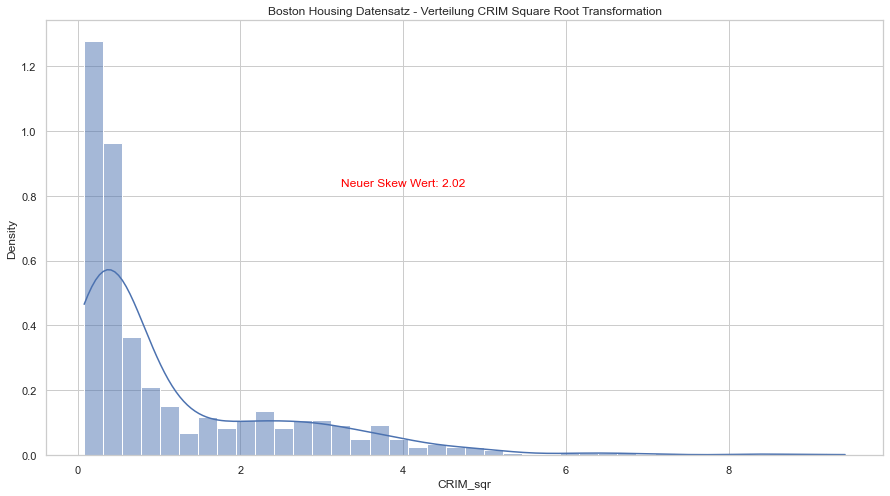

In [34]:
### TEST HERE #####
if 622 <= boston_df['CRIM_sqr'].sum() <= 623 and 0.2 <= CRIM_log_score <= 2.03: 
    print("Test successful")
    
    CRIM_sqr_score_2 = round(CRIM_sqr_score, 2)
    text = f"Neuer Skew Wert: {CRIM_sqr_score_2}"
    
    ax = plt.figure(figsize=(15,8))
    ax = sns.histplot(boston_df['CRIM_sqr'], kde = True, stat = 'density', bins = 40)
    ax.text(x = 4, y = 0.84, s = text, **text_kwargs, color = 'red')

    plt.title("Boston Housing Datensatz - Verteilung CRIM Square Root Transformation")

    plt.show()

**Interpretation:** In der Vorlesung haten wir bereits gelernt, dass bei der `Square Root`-Transformation höhere Werte stärker komprimiert werden, so dass niedrigere Werte besser verteilt werden.

Die Square Root Transformation ist hierbei aber nicht so aggressive wie eine Log-Transformation.

Die Verteilung hier sieht nur bedingt exponential aus, sodass der `skew` Wert größer ist, als der der Log-Transformation.

Der Wertebereich für `CRIM_sqr` ist auch komprimierter als der, der `log` Transformationen.

---

**Aufgabe 11 (Zusatzaufgabe)**: Vergleiche die Ergebnisse mit einer `Box-Cox` Transformation und interpretiere die Ergebnisse. Berechne anschließend den neuen Skew-Wert für die Variable `CRIM_bc` und speichere diesen unter der Variable `CRIM_bc_score`. Füge die neue Verteilung dem DataFrame boston_df unter der Spaltenbezeichnung `CRIM_bc` hinzu.

Informationen zur Box-Cox-Transformationen:
- [Intro to Box Cox Transformation](https://www.youtube.com/watch?v=pjwDpF_Igkw)
- [Python | Box-Cox Transformation](https://www.geeksforgeeks.org/box-cox-transformation-using-python/)
- [scipy.stats.boxcox](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

In [35]:
### CODE HERE ###
boston_df['CRIM_bc'] = stats.boxcox(boston_df['CRIM'])[0]
CRIM_bc_score = boston_df['CRIM_bc'].skew()

Test successful
Der optimale Wert für λ ist: -0.11


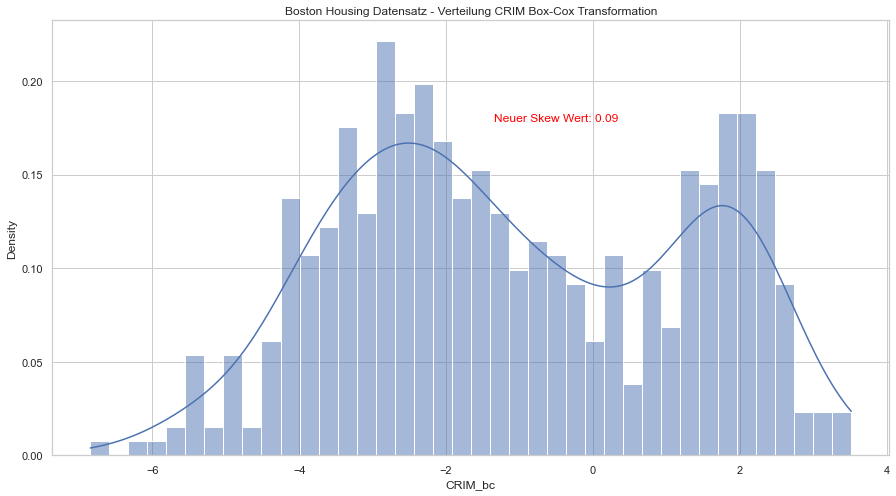

In [36]:
### TEST HERE ###
if -556 <= boston_df['CRIM_bc'].sum() <= -555 and 0.09 <= CRIM_bc_score <= 0.1: 
    print("Test successful")
    print("Der optimale Wert für λ ist:", round(stats.boxcox(boston_df['CRIM'])[1], 2))
    
    CRIM_bc_score_2 = round(CRIM_bc_score, 2)
    text = f"Neuer Skew Wert: {CRIM_bc_score_2}"
    
    ax = plt.figure(figsize=(15,8))
    ax = sns.histplot(boston_df['CRIM_bc'], kde = True, stat = 'density', bins = 40)
    ax.text(x = -0.5, y = 0.18, s = text, **text_kwargs, color = 'red')

    plt.title("Boston Housing Datensatz - Verteilung CRIM Box-Cox Transformation")

    plt.show()

**Interpretation:** Der Schiefewert ist von `5.2` auf nur noch `0.09` gesunken. Die Verteilung ist der durch die Log-Transformation entstandenen ziemlich ähnlich, nur etwas weniger bimodal.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 3. MIN-MAX, Z-Score und Robust-Scaler Transformation

Als Nächstes würden wir gerne weitere Methoden der **Standardisierung** verwenden, um Werte auf standardisierte Wertebereiche zu bringen.

Viele ML-Algorithmen performen besser mit skalierten Wertebereichen der Inputvariablen. Das inkludiert Algorithmen, die die **gewichtete Summe der Inputvariablen** verwenden, z. B. Linear Regression, Logistic Regression oder Neural Networks (Deep Learning), und Algorithmen die **Distanzen messen**, z. B. K-Nearest Neighbors oder Support Vector Machines.

Mit unterschiedlichen Wertebereichen und Einheiten (z. B. KM, Stunden, ...) haben die Inputvariablen auch unterschiedliche Wertebereiche. Die größeren Wertebereiche werden hier potenziell stärker gewichtet beim direkten Einsatz eines ML-Algorithmen, sodass dies in schlechterer Performance und Insensitvität gegenüber kleineren Wertebereichen resultiert.

In Allgemeinen macht es auch Sinn, wenn wir sowohl die **Input- als auch Outputvariablen** standardisieren.

**Datensatz:** Im nächsten Beispiel werden wir ein Datensatz verwenden für eine binäre Klassifizierung. Er umfasst 60 Eingabewerte und eine Zielvariable mit zwei Klassen. Der Datensatz enthält 208 Beispiele und die Klassen sind einigermaßen ausgewogen.

Der Datensatz beschreibt Radarrückmeldungen von Felsen oder simulierten Minen und ist hier zugänglich als [**Sonar Datensatz**](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv).

Eine **Beschreibung des Datensatzes** findet Ihr [hier](https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.names).


In [37]:
# Laden und Erstsichtung des Datensatzes
sonar_df = pd.read_csv('src/sonar_dataset', index_col=0)
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [38]:
# Überprüfung des korrekten Formats
np.array_equal(sonar_df.shape, [208, 61])

True

In [39]:
# Zusammenfassung über alle Spalten
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Die statistische Zusammenfassung zeigt, dass die bereitgestellten Eingabevariablen numerisch sind und ungefähr zwischen 0 und 1 liegen.

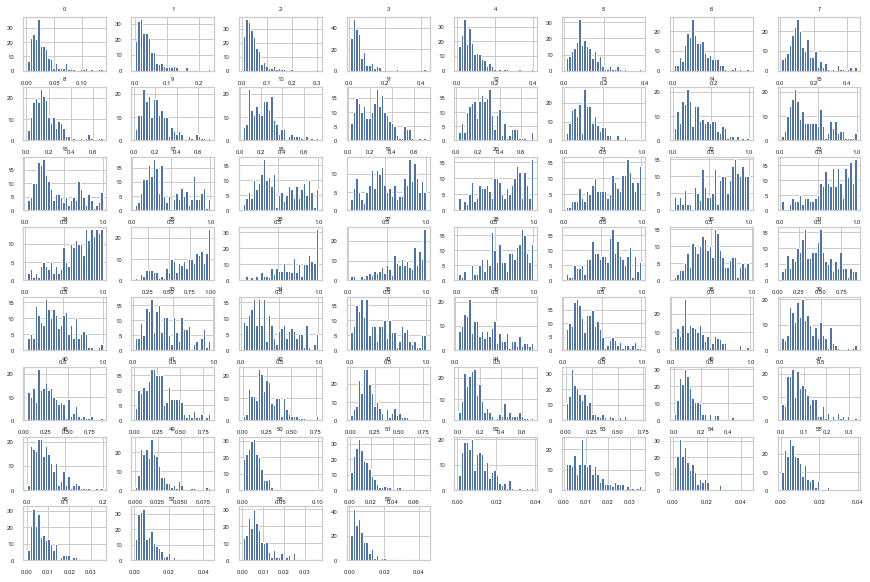

In [40]:
# Darstellung der Verteilungen aller Variablen
params = {'axes.titlesize':'6',
          'xtick.labelsize':'6',
          'ytick.labelsize':'6'}

matplotlib.rcParams.update(params)
sonar_df.hist(bins=30, figsize=(15, 10))
plt.show()

Wenn wir die Unübersichtlichkeit der Diagramme ignorieren und uns auf die Histogramme selbst konzentrieren, können wir erkennen, dass viele Variablen eine schiefe Verteilung aufweisen.

Um es etwas interessanter für Euch zu gestalten und den Impact der jeweiligen Transformationen in der Klassifikation zu sehen, habe ich ein kleines Skript bereitgestellt, welches die transformierten Werte nimmt und eine K-Nearest Neighbour Klassifizierung als Test durchführt und das Ergebnis ausgibt.

Wenn Ihr Interesse habt, könnt Ihr gerne selbst in das Skript reingucken. Das ist aber kein Muss, sondern eine interessante zusätzliche Aufgabe für diejenigen, die Lust haben.

Als erstes Testen wir die Performance ohne Transformationen.

In [41]:
import ml_model_and_test as ml

In [42]:
### TEST HERE ###
ml.evaluation(X = sonar_df.values[:, :-1], y = sonar_df.values[:, -1])

Accuracy: 0.797 (0.073)


Wir können sehen, dass das Model mit einer Genauigkeit von ca. 80% korrekt vorhergesagt wird, ob die Frequenzenmessungen ein metallisches oder steinartiges Objekt erkennen.

**Anmerkung**: Bitte bedenke, dass auf Grundlage der Natur des Algorithmus die Ergebnisse leicht abweichen können.

---

**Aufgabe 12**: Führe eine Transformation mit Hilfe der `Min-Max Skalierung` durch, um die Werte auf einen Bereich von 0 bis 1 zu standardisieren. Führe anschließend den Test durch und sehe, wie sich die Performance verändert. Sichere die transfomierten Inputvariablen in einen neuen DataFrame mit der Bezeichnung `sonar_df_mmtrans`

In [43]:
### CODE HERE ###
from sklearn.preprocessing import MinMaxScaler

mmtrans = MinMaxScaler()
sonar_df_mmtrans = pd.DataFrame(mmtrans.fit_transform(sonar_df.values[:, :-1]))

Test successful
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.204011    0.162180    0.139068    0.114342    0.173732    0.253615   
std      0.169550    0.141277    0.126242    0.110623    0.140888    0.158843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087389    0.067938    0.057326    0.044163    0.079508    0.152714   
50%      0.157080    0.129447    0.107753    0.090942    0.141517    0.220236   
75%      0.251106    0.202958    0.185447    0.139563    0.237319    0.333042   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.320472    0.285114    0.252485    0.281652  ...    0.160047   
std      0.167175    0.187767   

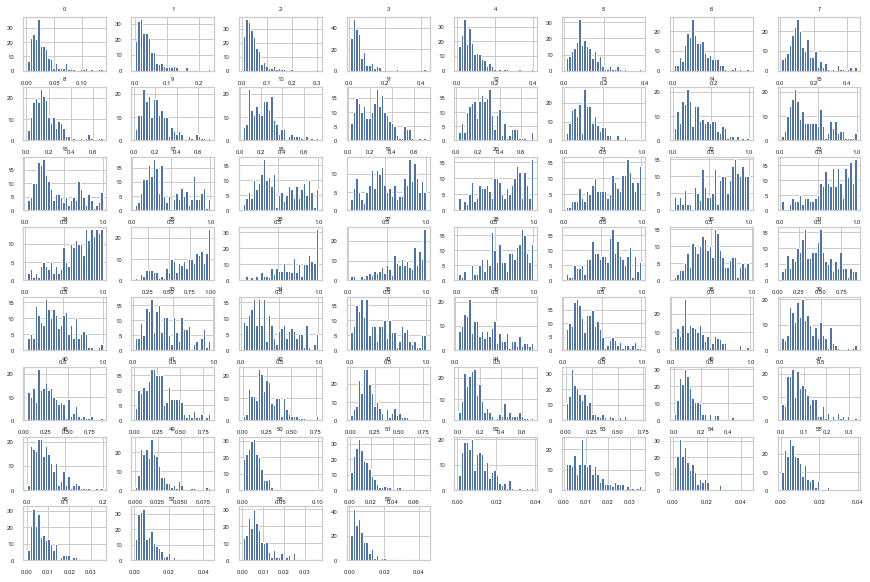

In [44]:
### TEST HERE ###
if all(sonar_df_mmtrans.describe().loc['max'].values.round(decimals=0) == 1) and \
    all(sonar_df_mmtrans.describe().loc['min'].values.round(decimals=0) == 0) and \
        sonar_df_mmtrans.sum().sum() == 4354.773996015757:
    
        print("Test successful")
        
        print(sonar_df_mmtrans.describe())
        sonar_df.hist(bins=30, figsize=(15, 10))
        plt.show()
        

Wir können sehen, dass die Verteilungen angepasst wurden und dass die Minimal- und Maximalwerte für jede Variable nun bei 0.0 bzw. 1.0 liegen. Darüber hinaus hat sich die Art der Verrteilungen, durch groben Vergleich der Histogramme, wenig verändert. Lasst uns nun die transformierten Werte verwenden, um das Modell zu trainieren.

In [45]:
### TEST HERE ###
ml.evaluation(X = sonar_df_mmtrans.values, y = sonar_df.values[:, -1])

Accuracy: 0.811 (0.093)


Die Accuarcy auf Basis der MinMaxScaler-Transformation sollte zu einer geringen Leistungssteigerung geführt haben.


Im nächsten Schritt wenden wir den **StandardScaler** direkt auf den Sonar-Datensatz an, um die Inputvariablen zu standardisieren.

---

**Aufgabe 13:** Führe eine Transformation mit Hilfe der `Standard Skalierung` durch. Führe anschließend den Test durch und sehe, wie sich die Performance des Klassifikators verändert. Sichere die transfomierten Inputvariablen in einen neuen DataFrame mit der Bezeichnung `sonar_df_sstrans`.

In [46]:
### CODE HERE ###
from sklearn.preprocessing import StandardScaler

sstrans = StandardScaler()
sonar_df_sstrans = pd.DataFrame(sstrans.fit_transform(sonar_df.values[:, :-1]))

Test successful
                 0             1             2             3             4   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean  -4.190024e-17  1.663333e-16 -9.661075e-17  1.627971e-16 -1.297039e-16   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00   
min   -1.206158e+00 -1.150725e+00 -1.104253e+00 -1.036115e+00 -1.236093e+00   
25%   -6.894939e-01 -6.686781e-01 -6.490624e-01 -6.359298e-01 -6.703975e-01   
50%   -2.774703e-01 -2.322506e-01 -2.486515e-01 -2.120457e-01 -2.292089e-01   
75%    2.784345e-01  2.893335e-01  3.682681e-01  2.285353e-01  4.524231e-01   
max    4.706053e+00  5.944643e+00  6.836142e+00  8.025419e+00  5.878863e+00   

                 5             6             7             8             9   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean   2.017617e-16  9.607699e-17  1.271019e-17 -3.339343e-16  2.268485e-17   
std    1.002413e+00  1.002413e+00  

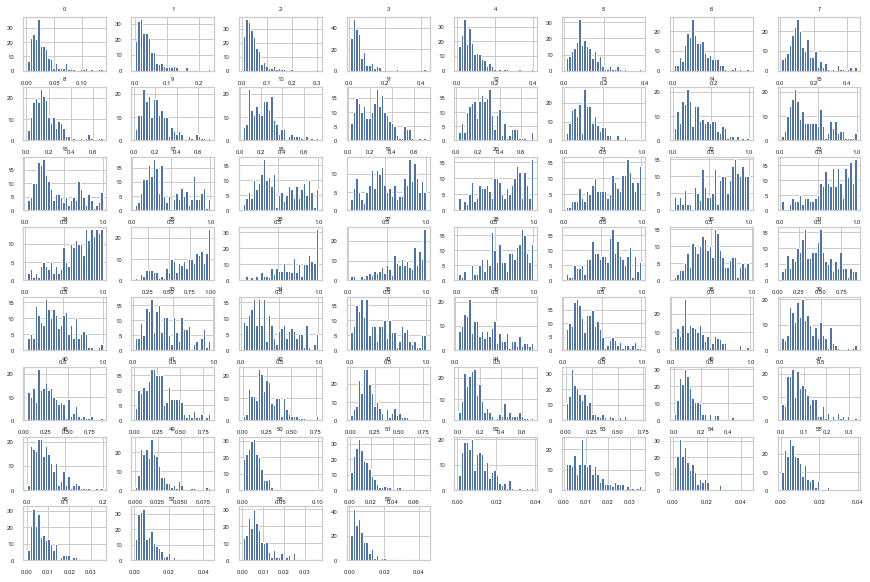

In [47]:
### TEST HERE ###
if all(sonar_df_sstrans.describe().loc['std'].values.round(decimals=0) == 1) and \
    all(sonar_df_sstrans.describe().loc['mean'].values.round(decimals=0) == 0) and \
        round(sonar_df_sstrans.sum().sum(), 1) == 0.0:
    
        print("Test successful")
        
        print(sonar_df_sstrans.describe())
        sonar_df.hist(bins=30, figsize=(15, 10))
        plt.show()

Wir können sehen, dass die Verteilungen angepasst wurden und dass der Mittelwert eine sehr kleine Zahl nahe bei `0.0` ist und die Standardabweichung für jede Variable sehr nahe bei `1.0` liegt.

In [48]:
### TEST HERE ###
ml.evaluation(X = sonar_df_sstrans.values, y = sonar_df.values[:, -1])

Accuracy: 0.806 (0.079)


Die Accuarcy auf Basis der StandardScaler-Transformation sollte zu einer geringen Leistungssteigerung geführt haben.

### Interpretation der Ergebniss

**Aufgabe 14:** Wann sollten Inputvariablen normalisiert (z. B. über `Min-Max-Scaler`) oder standardisiert (z. B. über `StandardScaler`) werden?


`### BEGRÜNDUNG HERE ###`

**Lösung:** Ob Input skaliert werden müssen, hängt von den Besonderheiten der Fragestellung und der einzelnen Variablen ab. Möglicherweise gibt es eine Reihe von Größen als Eingaben, z. B. Preise oder Temperaturen. Wenn die Verteilung der Menge normal ist, dann sollte diese **standardisiert** werden, andernfalls sollten die Daten **normalisiert** werden. Dies gilt, wenn der Bereich der Mengenwerte groß (10er, 100er, usw.) oder klein (0,01, 0,0001) ist.

Genannte Manipulationen werden im Allgemeinen verwendet, um die numerische Stabilität einiger Berechnungen zu verbessern. Einige Modelle [...] profitieren davon, dass die Prädiktoren auf einer gemeinsamen Skala liegen.

Im Zweifelsfall sollten die Inputvariablen **normalisiert** werden. Wenn über die nötigen Ressourcen verfügt werden, sollte die Modellierung mit Rohdaten, standardisierten Daten und normalisierten Daten untersucht und geprüft werden. Der positive Unterschied in der Leistung des resultierenden Modells entscheidet dann.

---

**Aufgabe 15**: Sollte erst standardisiert und dann normalisiert werden?

`### BEGRÜNDUNG HERE ###`

**Lösung**: Die **Standardisierung** kann sowohl positive als auch negative Werte ergeben, die um null herum zentriert sind. Es kann wünschenswert sein, Daten zu normalisieren, nachdem sie standardisiert wurden.

Dies kann sinnvoll sein, wenn es am Ende der Transformation eine Mischung aus standardisierten und normalisierten Variablen vorhanden ist. Durch eine **Normalisierung** haben somit alle Inputvariablen dieselben Minimal- und Maximalwerte für einen bestimmten Algorithmus. 

Dies ist zum Beispiel entscheidend für **ML-Algorithmen**, die die **Abstandsmaße** berechnen.

---

**Aufgabe 16:** Was funktioniert nun besser? Standardisierung oder Normalisierung?

`### BEGRÜNDUNG HERE ###`

**Lösung**: Dies ist ungewiss. Evaluiere die Modelle anhand von Daten, die mit jeder Transformation vorbereitet wurden, und verwende die **Transformation oder Kombination von Transformationen**, die für Ihren Datensatz die **beste Leistung** für Ihr Modell ergibt.

---

**Aufgabe 17:** Wie werden Werte behandelt, die potenziell später hinzukommen und so außerhalb der definierten Grenzen des Wertebereichs liegen?

`### BEGRÜNDUNG HERE ###`

**Lösung**: Daten können **normalisiert** werden, indem das Minimum und das Maximum der Trainingsdaten berechnet werden. Später können neue Daten hinzukommen, deren Werte kleiner oder größer als das Minimum bzw. Maximum sind.

Ein einfacher Ansatz zur Behandlung dieses Problems kann darin bestehen, dass vor der Skalierung geprüft wird, ob solche Werte außerhalb der Grenzen liegen, und diese Werte auf das bekannte Minimum oder Maximum ändern. Alternativ können bei der Normalisierung verwendeten Minimal- und Maximalwerte auch manuell auf der Grundlage von Fachwissen geschätzt werden.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 4. Impute von fehlenden Werten über K-Nearest Neighbor Algorithmus

Für die Durchführung der folgenden Übung verwenden wir wieder den **Boston Housing Datensatz** aus Abschnitt 2. Unten angestellt eine kleine Erinnerung wie der Datensatz aussieht:

In [49]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CRIM_log,CRIM_log2,CRIM_sqr,CRIM_bc
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-5.064036,-7.305860,0.079498,-6.843991
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-3.600502,-5.194427,0.165257,-4.447833
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-3.601235,-5.195484,0.165197,-4.448936
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-3.430523,-4.949199,0.179917,-4.194470
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-2.672924,-3.856215,0.262774,-3.122838


Der Datensatz hat keine fehlenden Werte bisher. Das werden wir kurz ändern. Anbei findet Ihr drei Index-Arrays, die zufällig gewälht sind mit den Größen `[40, 20, 5]`.

Diese drei Index-Arrays verwenden wir, um die jeweiligen Werte für die Variablen `INDUS`, `TAX` und `RM` auf `NULL` zu setzen.

In [50]:
i1 = [25,  70, 204,  33, 348, 144,  39, 194, 140, 188, 225, 285, 418,
      435, 352, 124, 481, 433, 192,  60, 436, 106, 468, 385, 498,  37,
      160, 490, 289,  82,  14, 128, 114, 465,  37, 204, 342,  32, 266,
      438]
i2 = [154,  20, 418,  11, 439, 471, 383,  38,  27, 181, 163,  98, 266,
      351, 100,  48, 292,  71, 502,   2]
i3 = [89,  15,   5, 195, 403]

boston_df.loc[i1, 'INDUS'] = np.nan
boston_df.loc[i2, 'TAX'] = np.nan
boston_df.loc[i3, 'RM'] = np.nan

boston_df.isnull().sum()

CRIM          0
ZN            0
INDUS        38
CHAS          0
NOX           0
RM            5
AGE           0
DIS           0
RAD           0
TAX          20
PTRATIO       0
B             0
LSTAT         0
PRICE         0
CRIM_log      0
CRIM_log2     0
CRIM_sqr      0
CRIM_bc       0
dtype: int64

---

**Aufgabe 18**: Füre einen `KNN-Imputer`über `sklearn`aus. Importiere dafür die Library. Nutze für den KNN-Imputer den Parameter `n_neighbors=3`. Überführe die resultierenden Daten in einen gesamtheitlichen DataFrame mit dem Variablennamen `boston_df_imputed`.

In [51]:
### CODE HERE ###
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer(n_neighbors=3)
imputed = KNN_imputer.fit_transform(boston_df)
boston_df_imputed = pd.DataFrame(imputed, columns = boston_df.columns)

In [52]:
### TEST HERE ###
if boston_df_imputed.loc[i1, 'INDUS'].sum() + boston_df_imputed.loc[i2, 'TAX'].sum() + \
    boston_df_imputed.loc[i3, 'RM'].sum() == 8286.306333333332:
    print("Test successful\n")
    
    print("Überprüfung fehlender Werte:\n", boston_df_imputed.isnull().sum())
    
    print("\nImpute Werte für INDUS: ", list(boston_df_imputed.loc[i1, 'INDUS'].values))

In der vorangegangen Aufgabe haben wir den Parameter `n_neighbors=3` vorgegeben. Die Frage ist, wie wir den optimalen Wert für K (Anzahl der berücksichtigten nächsten Punkte) finden.

Die ist stark abhängig von den später gewählten Modellen, ML-Algorithmen und Zielen der Analyse. Im nachfolgenden ist beispielhaft dargestellt, wie eine Optimierung für einen `Random Forest Algorithmus` aussieht.

Die Optimierung ist eine **Zusatzaufgabe** für Frewillige.

Zur Optimierung nehmen wir folgende Schritte an:
- Iteriere über den möglichen Bereich für K - alle Zahlen zwischen 1 und 20
- Durchführung der Imputation mit dem aktuellen K-Wert
- Aufteilung des Datensatzes in eine Trainings- und eine Testgruppe
- Anpassung des [Random-Forests-Modells](https://levelup.gitconnected.com/random-forest-regression-209c0f354c84)
- Vorhersage für die Testmenge
- Auswertung anhand des [RMSE](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/) (Root Mean Square Error)

Folgende Funktionen können hier nachgelesen werden:
- sklearn [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- sklearn [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- sklearn [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

---

**Aufgabe 19 (Zusatzaufgabe):**  Ergänze die fehlenden Zeilen auf Basis der Intruktionen. Versuche dem kommentierten Code zu folgen und die wesentlichen Schritte nachzuvollziehen.

In [53]:
### CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

def optimize_k(data, target, range_k):
    
    # Initialisierung leerer Liste zum sichern der Ergebnisse für unterschiedliche K
    errors = []
    
    # Loop über alle Werte im range_k
    for k in range(1, range_k, 1):
        
        # TODO: Führe für Parameter k eine KNN-Imputation durch und sichere in DaraFrame df_imputed 
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        # TODO: Teile die Daten in Inputvariable X und Targetvariable y - hier Variable target
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        
        # Teile die Daten in Trainings- und Testset über SKlearn train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Aufsetzen des Modells
        model = RandomForestRegressor(random_state=42)
        
        # Trainieren des Modells
        model.fit(X_train, y_train)
        
        # Erhalt der Prediction für X_test
        preds = model.predict(X_test)
        
        # Berechnung des Errors über RMSE auf Basis der y_test Daten und der Prediction preds
        error = sqrt(mean_squared_error(y_test,preds))
        
        # Hinzufügen des Berechneten Errors zu Liste erros
        errors.append({'K': k, 'RMSE': error})
        
    return errors

{'K': 1, 'RMSE': 2.971741247015912}
{'K': 2, 'RMSE': 3.2092037800614626}
{'K': 3, 'RMSE': 3.2310332257471988}
{'K': 4, 'RMSE': 3.280832422168639}
{'K': 5, 'RMSE': 3.2312548479123184}
{'K': 6, 'RMSE': 3.2806431504191615}
{'K': 7, 'RMSE': 3.2750494652752966}
{'K': 8, 'RMSE': 3.2114697691915723}
{'K': 9, 'RMSE': 3.19272508534453}
{'K': 10, 'RMSE': 3.20858637402951}
{'K': 11, 'RMSE': 3.224568416174206}
{'K': 12, 'RMSE': 3.2082601906610355}
{'K': 13, 'RMSE': 3.244208439968182}
{'K': 14, 'RMSE': 3.2218163766276127}
{'K': 15, 'RMSE': 3.222926742002326}
{'K': 16, 'RMSE': 3.215088956778645}
{'K': 17, 'RMSE': 3.2361648265058625}
{'K': 18, 'RMSE': 3.242346076289724}
{'K': 19, 'RMSE': 3.275255161441474}

Lowest Error Item:  {'K': 1, 'RMSE': 2.971741247015912}


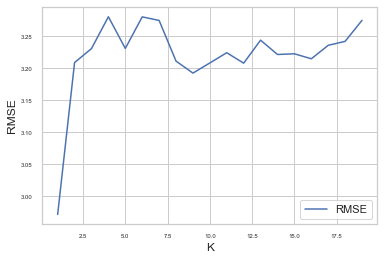

In [54]:
# Aufrufen der Funktion
k_errors = optimize_k(data=boston_df, target='PRICE', range_k=20)

# Printe die Ergebnisse pro Iteration
for line in k_errors:
    print(line)
    
# Erhalte das Minimum des RMSE
minPricedItem = min(k_errors, key=lambda x:x['RMSE'])
print("\nLowest Error Item: ", minPricedItem)

# Visualisierung des RMSE gegen K
curve = pd.DataFrame(data = k_errors)
curve = curve.set_index('K')
curve.plot()
plt.ylabel('RMSE')
plt.show()

---

**Aufgabe 20 (Zusatzaufgabe):**  Interpretiere die Ergebnisse. Was sagt der Wert von RMSE für K=12 aus? Und Spezialfrage: Warum ändert sich das Ergebnis, wenn der `RandomState` für das `RandomForestRegression` Model geändert wird?

`### BEGRÜNDUNG HERE ###`

**Lösung**: Es sieht so aus, als ob K=12 der optimale Wert in dem gegebenen Bereich ist, da er den kleinsten Fehler ergibt. Der Fehler mithilfe des mittleren quadratischen Fehlers berechnet, der die Standardabweichung der Residuen (Vorhersagefehler) wiedergibt.

Residuen sind ein Maß dafür, wie weit die Datenpunkte von der Regressionslinie entfernt sind; RMSE ist ein Maß dafür, wie weit diese Residuen gestreut sind. Mit anderen Worten, er gibt an, wie konzentriert die Daten um die Linie der besten Anpassung sind.

Die Minimierung dessen gibt eine gute Indikation für die beste Wahl von K zur Imputation der Daten.